In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [4]:
df=pd.read_csv("logs/sensors_230507_231802.csv").dropna()
# del df["rgb"]
df["time"]=pd.to_datetime(df["time"])
df=df.set_index('time')
df.iloc[[0,1,-2,-1]]

,temperature,pressure,humidity,gas_resistance,iaq,oxidising,reducing,nh3,r,g,b,c
time,,,,,,,,,,,,
2023-05-07 23:23:05.081981,23.37900,1021.68,38.933,1.617374e+06,99.333125,76708.333333,193260.869565,100106.194690,0.0,0.0,0.0,0.0
2023-05-07 23:23:06.079288,23.31175,1021.69,38.933,1.616417e+06,99.333125,76708.333333,193260.869565,100212.534060,0.0,0.0,0.0,0.0
2023-05-29 01:08:44.634018,23.58690,1027.86,32.429,1.360797e+06,83.482806,128340.836013,149852.782765,112741.721854,0.0,0.0,0.0,0.0
2023-05-29 01:08:45.634849,23.57345,1027.86,32.435,1.358090e+06,83.360797,128340.836013,149852.782765,112617.647059,0.0,0.0,0.0,0.0


In [3]:
df[["temperature","pressure","humidity","gas_resistance","iaq","oxidising","reducing","nh3", "c"]].corr()

,temperature,pressure,humidity,gas_resistance,iaq,oxidising,reducing,nh3,c
temperature,1.000000,0.061533,-0.351343,-0.410150,-0.501300,-0.089158,-0.419447,-0.623610,0.120904
pressure,0.061533,1.000000,-0.666655,0.087074,-0.030399,0.711295,-0.361972,0.398620,0.059821
humidity,-0.351343,-0.666655,1.000000,-0.167508,-0.006974,-0.770967,0.449128,-0.444965,-0.231647
gas_resistance,-0.410150,0.087074,-0.167508,1.000000,0.976327,0.273094,0.593133,0.697833,0.206982
iaq,-0.501300,-0.030399,-0.006974,0.976327,1.000000,0.148042,0.671425,0.639236,0.173742
oxidising,-0.089158,0.711295,-0.770967,0.273094,0.148042,1.000000,-0.512817,0.677343,0.089196
reducing,-0.419447,-0.361972,0.449128,0.593133,0.671425,-0.512817,1.000000,0.163049,0.005914
nh3,-0.623610,0.398620,-0.444965,0.697833,0.639236,0.677343,0.163049,1.000000,0.099033
c,0.120904,0.059821,-0.231647,0.206982,0.173742,0.089196,0.005914,0.099033,1.000000


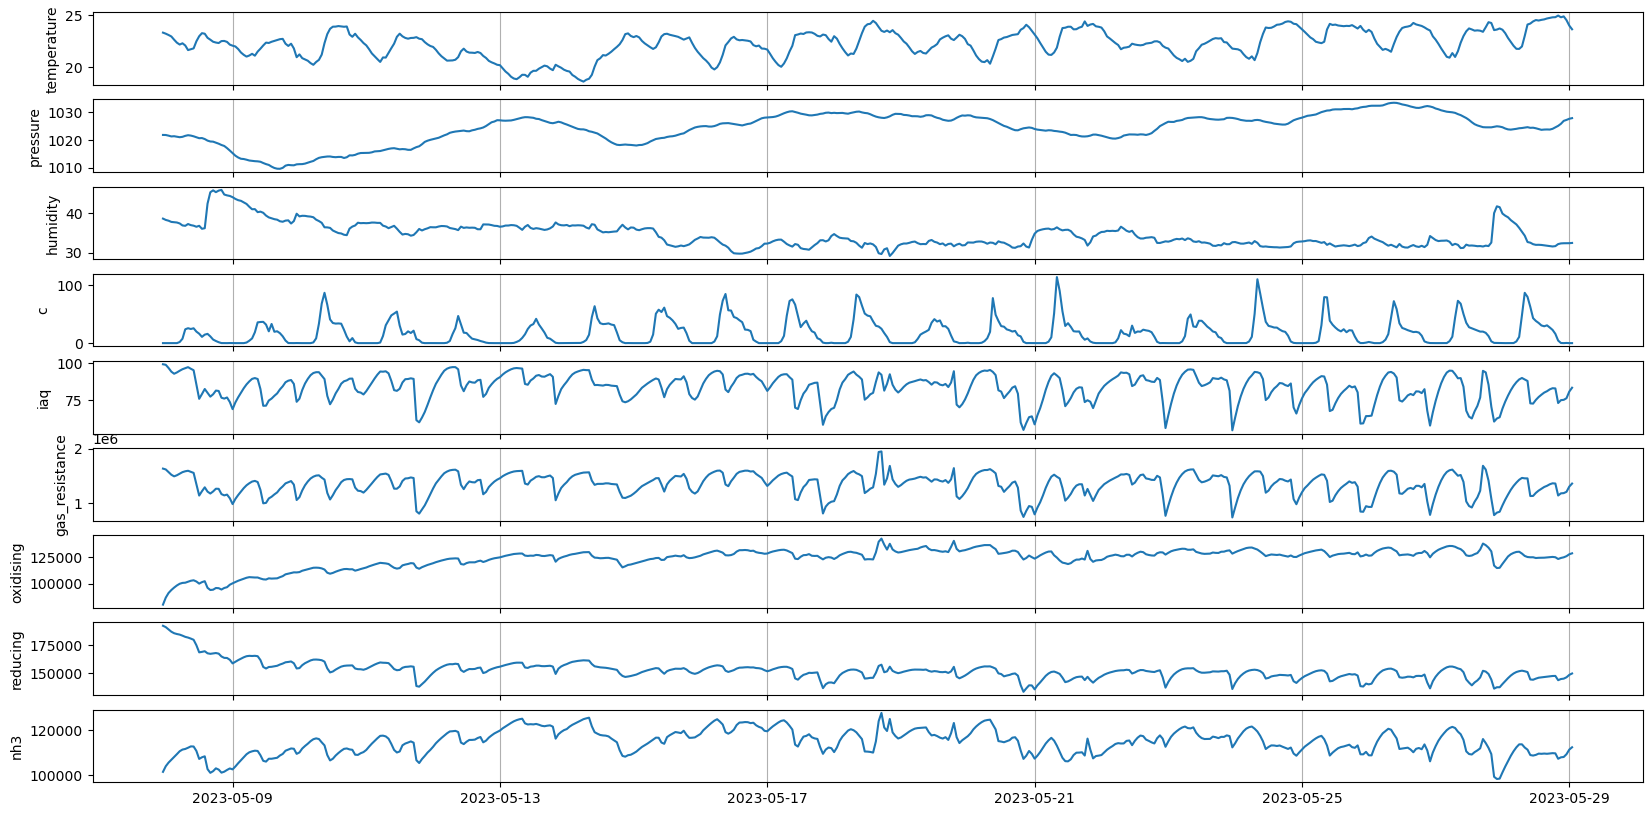

In [10]:
df_dmean = df.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df_dmax = df.groupby(pd.Grouper(freq='d')).max().dropna(how='all')
df_hmean = df.groupby(pd.Grouper(freq='H')).mean().dropna(how='all')
# df2[['pressure','humidity','light']].plot(figsize=(15,10))

# plt.figure(figsize=(15,10))
# plt.plot(df[['pressure','humidity']],label=['pressure','humidity'])
# plt.twinx()
# plt.legend()
# plt.plot(df2[['light']],label='light')
# plt.legend()

cols=["temperature","pressure","humidity","c","iaq", "gas_resistance", "oxidising", "reducing", "nh3"]

df_sel=df_hmean["2023-05-07":"2023-05-29"]

fig,axes=plt.subplots(len(cols),1,sharex=True,figsize=(20,10))

for col,ax in zip(cols,axes):
    ax.plot(df_sel[col],label='col')
    ax.grid(axis='x')
    ax.set_ylabel(col)
    
# pres.plot(df_sel['pressure'],label='pressure',c='r')
# hum.plot(df_sel['humidity'],label='humidity',c='g')
# light.plot(df_sel['light'],label='light')
# for ax in fig.axes:
#     ax.grid(axis='x')

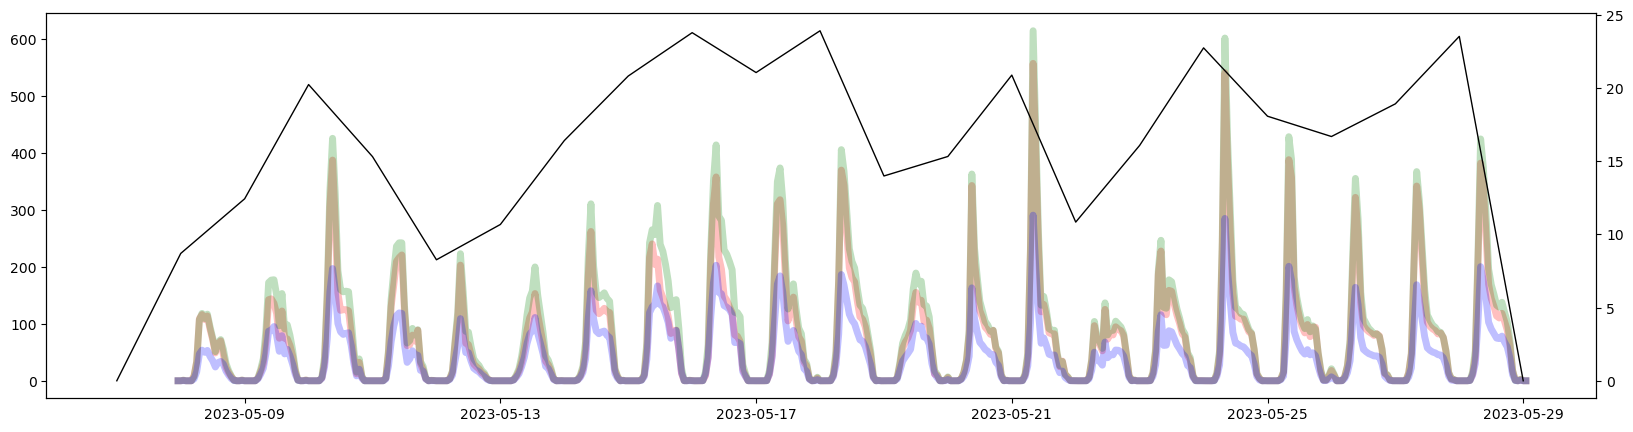

In [57]:
plt.figure(figsize=(20,5))
plt.plot(df_hmean["r"],"r",df_hmean["g"],"g",df_hmean["b"],"b",alpha=0.25,linewidth=5)
plt.twinx()
plt.plot(df_dmean["c"],"k",linewidth=1)

<BarContainer object of 507 artists>

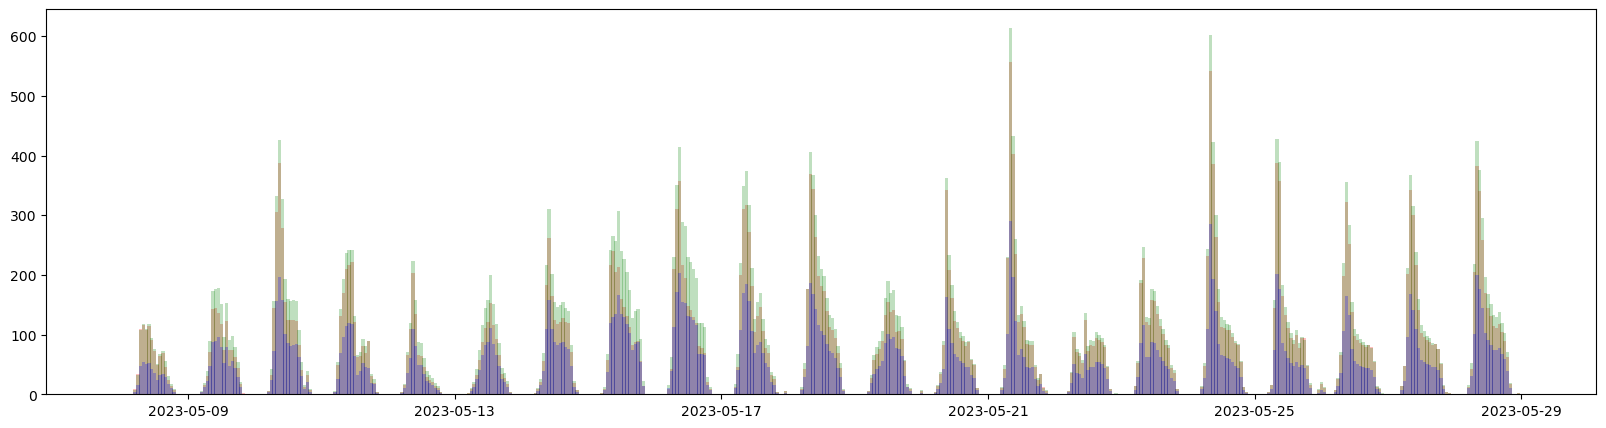

In [55]:
plt.figure(figsize=(20,5))
plt.bar(df_hmean.index, df_hmean["r"],width=0.05,alpha=0.25,color="r")
plt.bar(df_hmean.index, df_hmean["g"],width=0.05,alpha=0.25,color="g")
plt.bar(df_hmean.index, df_hmean["b"],width=0.05,alpha=0.25,color="b")

In [ ]:
def color24bit_to_rgb(col):
    return ((col>>16)&0xff)/255.0, ((col>>8)&0xff)/255.0, (col&0xff)/255.0

def mag(col):
    r,g,b=col
    return (r*r+b*b+g*g)**0.5

def daily_mean(day):
    try:
        return day.mean()
    except:
        r,g,b=0,0,0
        for v in day:
            r+=v[0]
            g+=v[1]
            b+=v[2]
        return r/len(day),g/len(day),b/len(day)
    
rgb1=df["rgb"].apply(color24bit_to_rgb)
mags=rgb1.apply(mag)


daily_color=rgb1[mags>0.25].groupby(pd.Grouper(freq='d')).apply(daily_mean).dropna(how='all')

# plt.figure(figsize=(20,10))
# plt.plot(mags[mags>0.25])
fig, ax = plt.subplots(figsize=(8, 5))

for i, col in enumerate(daily_color):
    r,g,b=col
    try:
        ax.vlines(i,0,1,colors=(r,g,b))
    except:
        print(i,col)
        raise